In [29]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models
import csv
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
%matplotlib inline

In [30]:
df=pd.read_excel("/content/review.xlsx")
df

,reviews.text
0,I thought it would be as big as small paper bu...
1,This kindle is light and easy to use especiall...
2,Didnt know how much i'd use a kindle so went f...
3,I am 100 happy with my purchase. I caught it o...
4,Solid entry level Kindle. Great for kids. Gift...
...,...
4995,This is a great tablet for the price. Amazon i...
4996,This tablet is the perfect size and so easy to...
4997,Purchased this for my son. Has room to upgrade...
4998,I had some thoughts about getting this for a 5...


In [31]:
import re #regular expression
import string

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x)

In [32]:
df['reviews.text'] = df['reviews.text'].apply(clean)
df

,reviews.text
0,i thought it would be as big as small paper bu...
1,this kindle is light and easy to use especiall...
2,didnt know how much id use a kindle so went fo...
3,i am happy with my purchase i caught it on sa...
4,solid entry level kindle great for kids gifted...
...,...
4995,this is a great tablet for the price amazon is...
4996,this tablet is the perfect size and so easy to...
4997,purchased this for my son has room to upgrade ...
4998,i had some thoughts about getting this for a ...


In [33]:
#Word frequency
freq = pd.Series(' '.join(df['reviews.text']).split()).value_counts()
freq

the            6738
to             5015
and            5008
it             4719
i              4491
               ... 
engage            1
dropsthrows       1
theyll            1
jumps             1
purposeit         1
Length: 5927, dtype: int64

In [34]:
import nltk
nltk.download('stopwords')

import nltk
nltk.download('punkt')
from nltk import tokenize

#removing stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['reviews.text'] = df['reviews.text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [35]:
freq_Sw = pd.Series(' '.join(df['reviews.text']).split()).value_counts()
freq_Sw

great          1591
tablet         1296
love           1083
use            1081
easy            816
               ... 
naturally         1
engage            1
dropsthrows       1
theyll            1
purposeit         1
Length: 5796, dtype: int64

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
vectorizer = CountVectorizer(min_df = 1, max_df = 0.9)
X = vectorizer.fit_transform(df["reviews.text"])
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])
#print(word_freq_df.sort('occurrences',ascending = False).head())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [37]:
word_freq_df

,term,occurrences,frequency
0,abc,4,0.000052
1,abilities,2,0.000026
2,ability,56,0.000728
3,abke,1,0.000013
4,able,219,0.002846
...,...,...,...
5757,äúshow,1,0.000013
5758,äúskills,1,0.000013
5759,äústar,2,0.000026
5760,äúthings,2,0.000026


In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True) #keep top 1000 words
doc_vec = vectorizer.fit_transform(df["reviews.text"])
names_features = vectorizer.get_feature_names()
dense = doc_vec.todense()
denselist = dense.tolist()
df2 = pd.DataFrame(denselist, columns = names_features)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [39]:
df2

,ability,able,absolutely,access,account,accounts,activate,activated,actually,add,...,youll,young,youre,youtube,yr,äôm,äôs,äôt,äôve,äù
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
df2

,ability,able,absolutely,access,account,accounts,activate,activated,actually,add,...,youll,young,youre,youtube,yr,äôm,äôs,äôt,äôve,äù
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
#bi-gram
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [42]:
top2_words = get_top_n2_words(df["reviews.text"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["bi-gram", "Freq"]
top2_df.head()

,bi-gram,Freq
0,easy use,340
1,year old,233
2,echo show,174
3,kindle fire,145
4,works great,144


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

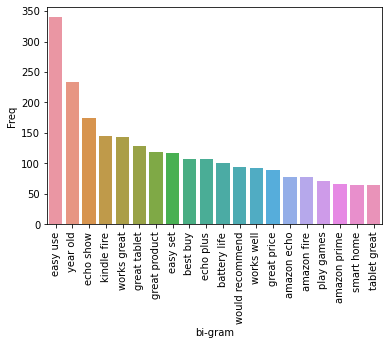

In [43]:
import seaborn as sns
sns.barplot(x=top2_df["bi-gram"][:20],y=top2_df["Freq"][:20])   #Most of customer has reviews about "easy use" on amazon products which is good.
plt.xticks(rotation=90)

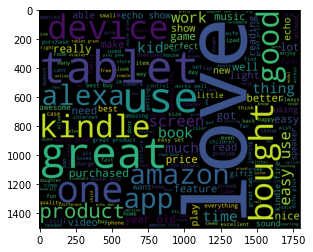

In [44]:
string_Total = " ".join(df["reviews.text"])
#wordcloud for entire corpus
from wordcloud import WordCloud
wordcloud_stw = WordCloud(
                background_color= 'black',
                width = 1800,
                height = 1500
                ).generate(string_Total)
plt.imshow(wordcloud_stw) 

Most word is used in amazon review +ve like Love , Great etc

Most reviwes are about tablet, kindle,alexa and so on.

In [45]:
!pip install afinn
from afinn import Afinn
afinn=Afinn(language='en')#setting language to english

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [46]:
df["afinn_score"]= df["reviews.text"].apply(afinn.score)#to calculate the sentiment total score of each documents in text.
df

,reviews.text,afinn_score
0,thought would big small paper turn like palm t...,7.0
1,kindle light easy use especially beach,1.0
2,didnt know much id use kindle went lower end i...,3.0
3,happy purchase caught sale really good price n...,17.0
4,solid entry level kindle great kids gifted kid...,14.0
...,...,...
4995,great tablet price amazon good job,6.0
4996,tablet perfect size easy use read play games p...,7.0
4997,purchased son room upgrade memory allow books ...,5.0
4998,thoughts getting year old get screen protector...,0.0


In [47]:
def word_count(text_string):
    '''Calculate the number of words in a string'''
    return len(text_string.split())

In [48]:
df['word_count'] = df['reviews.text'].apply(word_count)
df

,reviews.text,afinn_score,word_count
0,thought would big small paper turn like palm t...,7.0,19
1,kindle light easy use especially beach,1.0,6
2,didnt know much id use kindle went lower end i...,3.0,14
3,happy purchase caught sale really good price n...,17.0,69
4,solid entry level kindle great kids gifted kid...,14.0,19
...,...,...,...
4995,great tablet price amazon good job,6.0,6
4996,tablet perfect size easy use read play games p...,7.0,10
4997,purchased son room upgrade memory allow books ...,5.0,14
4998,thoughts getting year old get screen protector...,0.0,12


In [49]:
df.describe()

,afinn_score,word_count
count,5000.000000,5000.000000
mean,4.825400,15.355400
std,4.191996,21.944717
min,-8.000000,1.000000
25%,2.000000,7.000000
50%,4.000000,10.000000
75%,7.000000,17.000000
max,53.000000,739.000000


In [50]:
df['afinn_adjusted_score'] = df['afinn_score'] / df['word_count'] * 100
df

,reviews.text,afinn_score,word_count,afinn_adjusted_score
0,thought would big small paper turn like palm t...,7.0,19,36.842105
1,kindle light easy use especially beach,1.0,6,16.666667
2,didnt know much id use kindle went lower end i...,3.0,14,21.428571
3,happy purchase caught sale really good price n...,17.0,69,24.637681
4,solid entry level kindle great kids gifted kid...,14.0,19,73.684211
...,...,...,...,...
4995,great tablet price amazon good job,6.0,6,100.000000
4996,tablet perfect size easy use read play games p...,7.0,10,70.000000
4997,purchased son room upgrade memory allow books ...,5.0,14,35.714286
4998,thoughts getting year old get screen protector...,0.0,12,0.000000


In [51]:
print(np.round(df[df["afinn_adjusted_score"]>0].shape[0]/(df.shape[0])*100,2),"%")

88.16 %


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


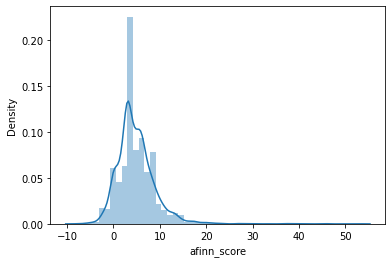

In [52]:
sns.distplot(df["afinn_score"]) ;

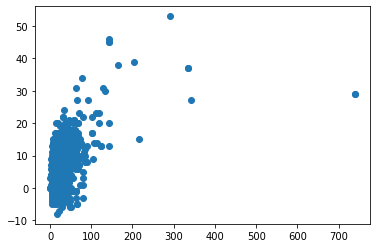

In [53]:
plt.scatter(y='afinn_score', x='word_count',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


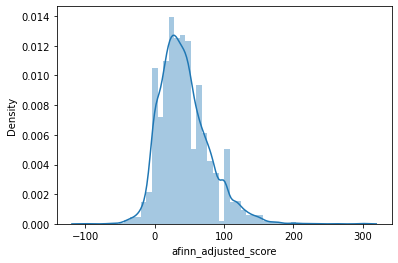

In [54]:
sns.distplot(df["afinn_adjusted_score"])